In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
from math import pi
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
#Parameters
nx = 41
ny = 41
xmin = 0
xmax = 1
ymin = -0.5
ymax = 0.5

l2_target = 2e-7

In [10]:
def poisson_IG(nx, ny, xmax, xmin, ymax, ymin):
    '''Initialize the Poisson problem with a guess
    
    Parameters:
        nx - number of x mesh points
        ny - number of y mesh points
        xmax - max value of x
        xmin, min value of x
        ymax - 
        ymin - 
        
    Returns:
        X - X-position of mesh
        Y - Y-position of mesh
        p_i - intial guess for p
        b - forcing function
        dx - mesh size in x
        dy - mesh size in y
    '''
    
    dx = (xmax - xmin)/(nx-1)
    dy = (ymax-ymin)/(ny - 1)
    
    #Mesh
    x = numpy.linspace(xmin, xmax, nx)
    y = numpy.linspace(ymin, ymax, ny)
    X,Y = numpy.meshgrid(x,y)
    
    #source
    L = xmax - xmin
    b = -2*(pi/L)**2*numpy.sin(pi*X/L)*numpy.cos(pi*Y/L)
    
    #initialize
    p_i = numpy.zeros((ny, nx))
    
    return X, Y, x, y, p_i, b, dx, dy, L

In [11]:
from laplace_helper import L2_rel_error

In [19]:
def poisson_2d(p, b, dx, dy, l2_target):
    '''Jacobi relaxation
    
    Parameters: 
        p - initial guess
        b - source term
        dx - mesh spacing in x
        dy - mesh spacing in y
        l2_target - target difference between iterations
    Returns:
        p - distribution after relaxation
    '''
    
    l2_norm = 1
    iterations = 0
    l2_conv = []
    
    while l2_norm > l2_target:
        pd = p.copy()
        p[1:-1,1:-1] = 1/(2*(dx**2 + dy**2)) * \
        ((pd[1:-1,2:]+pd[1:-1,:-2])*dy**2 +\
         (pd[2:,1:-1] + pd[:-2,1:-1])*dx**2 -\
         b[1:-1,1:-1]*dx**2*dy**2)
        
        #BC's are already enforced by copying from last iteration
        l2_norm = L2_rel_error(pd, p)
        iterations += 1
        l2_conv.append(l2_norm)
        
    print('Number of Jacobi iterations: {0:d}'.format(iterations))
    return p, l2_conv
        

In [20]:
from laplace_helper import plot_3D

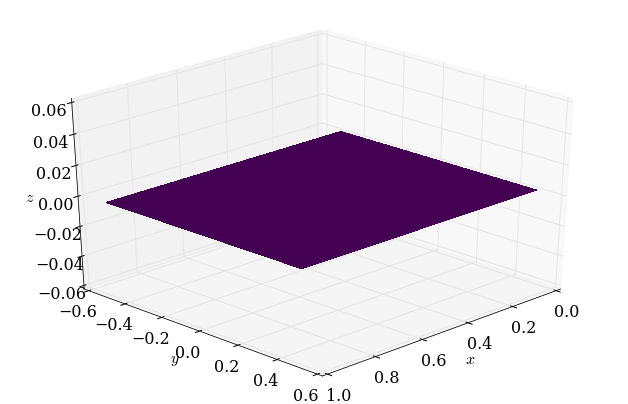

In [21]:
X, Y, x, y, p_i, b, dx, dy, L = poisson_IG(nx, ny, xmax, xmin, ymax, ymin)
plot_3D(x, y, p_i)

In [22]:
p, l2_conv = poisson_2d(p_i.copy(), b, dx, dy, l2_target)

Number of Jacobi iterations: 3125


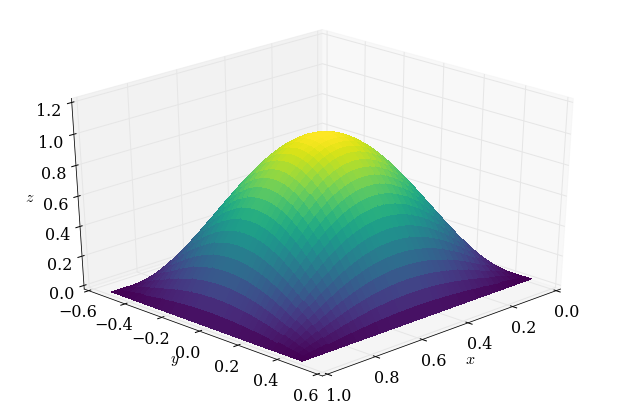

In [23]:
plot_3D(x, y, p)

In [24]:
def p_analytical(X, Y, L):
    '''Computes analytical solution to Poisson problem
    
    Parameters:
        X - mesh with x components
        Y - mesh
        L - size of domain
    Returns:
        Analytical solution
    '''
    return numpy.sin(X*pi/L)*numpy.cos(Y*pi/L)

In [25]:
p_an = p_analytical(X, Y, L)
error = L2_rel_error(p, p_an)
error

0.00044962635353597519

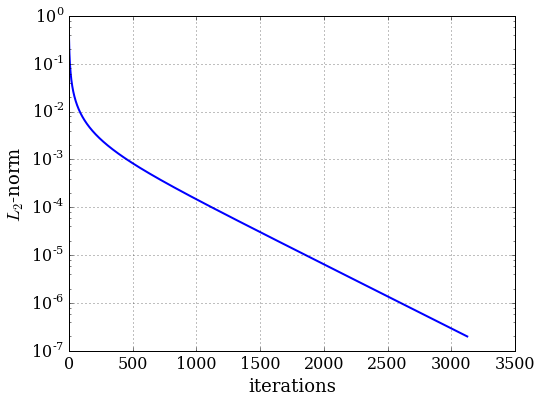

In [28]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'iterations', fontsize=18)
pyplot.ylabel(r'$L_2$-norm', fontsize=18)
pyplot.semilogy(numpy.arange(len(l2_conv)), l2_conv, lw=2);

In [29]:
nx_values = [11, 21, 41, 81]
error = numpy.zeros_like(nx_values, dtype=numpy.float)
for i, nx in enumerate(nx_values):
    ny = nx
    X, Y, c, y, p_i, b, dx, dy, L = poisson_IG(nx, ny, xmax, xmin, ymax, ymin)
    p, l2_conv = poisson_2d(p_i.copy(), b, dx, dy, l2_target)
    p_an = p_analytical(X, Y, L)
    
    error[i] = L2_rel_error(p, p_an)

Number of Jacobi iterations: 249
Number of Jacobi iterations: 892
Number of Jacobi iterations: 3125
Number of Jacobi iterations: 10708


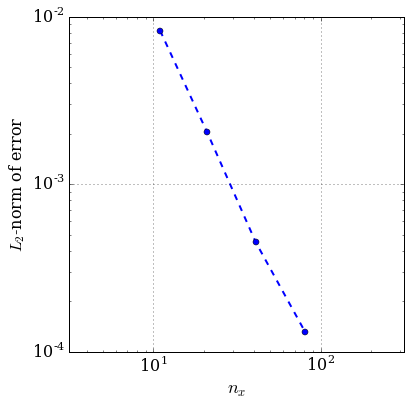

In [30]:
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel(r'$n_x$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of error')
pyplot.loglog(nx_values, error, ls='--', lw=2, marker='o')
pyplot.axis('equal');